# S&P 500

In [1]:
import os

In [2]:
os.getcwd()

'/Users/chengyixu/Desktop/TheWrightStarLLC/1-ETF'

In [5]:
import pandas as pd
from bs4 import BeautifulSoup
import re
import xlwt
import urllib.request,urllib.error
from requests import post
import requests
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')
from invpy.scrape import *
import investpy
from pandas_datareader import data
import io
import time
import openpyxl

In [6]:
df = pd.read_excel('/Users/chengyixu/Desktop/TheWrightStarLLC/1-ETF/01 ETF Portfolio-updated.xlsx', sheet_name='Symbol')
print(df)

    Symbol Industries
0      PFI  ^sp500-60
1      PGF  ^sp500-50
2      PSP  ^sp500-35
3     KBWD  ^sp500-40
4     KBWP      ^gspe
..     ...        ...
158   SQQQ        NaN
159   SPXS        NaN
160   MIDZ        NaN
161   RUSS        NaN
162    SMN        NaN

[163 rows x 2 columns]


In [5]:
df.iloc[0:9,]

,Symbol,Industries
0,PFI,^sp500-60
1,PGF,^sp500-50
2,PSP,^sp500-35
3,KBWD,^sp500-40
4,KBWP,^gspe
5,PSCF,^sp500-55
6,FXO,^sp500-20
7,IAK,^sp500-30
8,IXG,^sp500-45


In [7]:
etflist = df[['Symbol']]
etflist

,Symbol
0,PFI
1,PGF
2,PSP
3,KBWD
4,KBWP
...,...
158,SQQQ
159,SPXS
160,MIDZ
161,RUSS


In [35]:
indexList = ['S&P 500 REAL ESTATE','S&P 500 TELECOM SERVICES',
             'S&P 500 HEALTH CARE','S&P 500 FINANCIALS','S&P 500 ENERGY',
             'S&P 500 UTILITIES','S&P 500 INDUSTRIALS','S&P 500 CONSUMER STAPLES',
             'S&P 500 INFORMATION TECHNOLOGY']

In [8]:
investpy.get_index_historical_data(index='S&P 500 REAL ESTATE', country="united states",from_date='03/12/2019',to_date='01/05/2020')

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2019-12-02,234.36,236.53,234.36,236.00,59856284,USD
2019-12-03,235.17,237.94,235.17,237.42,54456640,USD
2019-12-04,236.97,237.56,236.02,237.55,49194184,USD
2019-12-05,238.00,238.81,237.55,237.79,47031448,USD
2019-12-08,238.00,238.66,237.03,238.11,41876792,USD
...,...,...,...,...,...,...
2020-04-26,206.94,211.74,206.87,211.23,71723856,USD
2020-04-27,215.66,217.21,211.08,211.28,88839496,USD
2020-04-28,215.81,216.03,211.73,212.02,112917280,USD


In [16]:
#get data of recent month
investpy.indices.get_index_recent_data(index='S&P 500 REAL ESTATE',country="united states",as_json=False, order='ascending', interval='Daily')

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2020-04-05,189.97,195.79,189.55,195.02,108376328,USD
2020-04-06,203.72,204.72,195.12,195.25,110200576,USD
2020-04-07,197.45,210.65,195.54,209.71,98072032,USD
2020-04-08,213.02,223.08,213.02,220.50,133064848,USD
2020-04-12,218.78,219.28,209.10,210.39,74309984,USD
2020-04-13,215.45,218.02,214.79,217.24,78694984,USD
2020-04-14,211.39,212.91,207.12,208.96,83679312,USD
2020-04-15,209.93,210.94,206.35,207.72,83194736,USD
2020-04-16,213.73,215.12,210.78,214.41,89905568,USD


In [9]:
def daily_closing_price(indexList,from_date, to_date):
    df_final = pd.DataFrame()
    for i in indexList:
        df = investpy.get_index_historical_data(index= i,
                                            country='united states',
                                            from_date= from_date,
                                            to_date= to_date)
        df_final[[i]]=df.rename(columns={'Close': i})[[i]].reset_index(drop=True)
    
    df_close = df_final.set_index(df.index)
    df_close = df_close.set_index(df_close.index+pd.DateOffset(1))   
    df_changes = df_close.pct_change()

    writer = pd.ExcelWriter('S&P500.xlsx', engine='xlsxwriter')

    df_close.to_excel(writer, sheet_name='Daily Closing Price')
    df_changes.to_excel(writer, sheet_name='Daily Return')
    
    writer.save()

In [10]:
daily_closing_price(indexList,'03/12/2019','01/05/2020')

In [11]:
#anthoer method: but only data of the recent month

In [12]:
url = 'https://www.investing.com/indices/s-p-500-telecom-services-historical-data'
agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36'

request = Request(url, headers={'User-Agent': agent})
html = urlopen(request).read().decode()
soup = BeautifulSoup(html, 'html.parser')

div = soup.find(id="results_box")
table = div.find('table', attrs={'class':'genTbl closedTbl historicalTbl'})
table_rows = table.find_all('tr')

res = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        res.append(row)

df = pd.DataFrame(res, columns=["date","price", "open", "high", "low","vol","change"])
df.to_csv("data_telecom.csv")

In [13]:
pd.read_csv('data_telecom.csv',index_col=['date'])

,Unnamed: 0,price,open,high,low,vol,change
date,,,,,,,
"May 04, 2020",0,168.53,167.99,168.64,165.97,205.86M,0.32%
"May 01, 2020",1,167.99,170.66,171.05,167.08,214.35M,-1.56%
"Apr 30, 2020",2,170.66,170.62,171.86,168.96,320.76M,0.02%
"Apr 29, 2020",3,170.62,162.42,172.09,162.42,267.91M,5.05%
"Apr 28, 2020",4,162.42,165.55,167.01,162.28,212.03M,-1.89%
"Apr 27, 2020",5,165.55,164.63,166.42,164.63,211.36M,0.56%
"Apr 24, 2020",6,164.63,162.91,164.67,160.89,206.76M,1.06%
"Apr 23, 2020",7,162.91,161.76,164.75,161.76,219.42M,0.71%
"Apr 22, 2020",8,161.76,157.99,163.19,157.99,245.55M,2.39%


# Quotes

In [24]:
import pandas as pd
import numpy as np
import investpy
import datetime
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
investpy.get_etf_historical_data(etf='Direxion Daily Utilities Bull 3X Shares',
                                      country='united states',
                                      from_date='03/12/2019',
                                      to_date='01/05/2020')

,Open,High,Low,Close,Currency,Exchange
Date,,,,,,
2019-12-02,42.45,42.69,42.22,42.61,USD,NYSE
2019-12-03,42.56,43.53,42.56,43.50,USD,NYSE
2019-12-04,43.25,43.66,42.98,43.66,USD,NYSE
2019-12-05,43.36,44.03,43.31,43.35,USD,NYSE
2019-12-08,43.35,43.35,42.63,42.83,USD,NYSE
...,...,...,...,...,...,...
2020-04-26,23.41,23.76,23.24,23.50,USD,NYSE
2020-04-27,24.72,25.00,23.40,23.65,USD,NYSE
2020-04-28,24.30,24.30,22.85,23.03,USD,NYSE


In [17]:
start = dt.datetime(2019, 12, 2)
end = dt.datetime(2020, 5, 4)
yf.pdr_override()

In [18]:
pdr.get_data_yahoo('PFI',start,end)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-02,38.419998,38.419998,37.880001,37.880001,37.313862,5200
2019-12-03,37.180000,37.919998,37.180000,37.919998,37.353260,69300
2019-12-04,38.040001,38.169998,38.029999,38.130001,37.560127,11600
2019-12-05,38.150002,38.200001,38.040001,38.189999,37.619225,4300
2019-12-06,38.509998,38.520000,38.480000,38.480000,37.904892,800
...,...,...,...,...,...,...
2020-04-27,31.160000,32.080002,31.160000,32.040001,32.040001,3400
2020-04-28,32.459999,32.459999,31.900000,31.900000,31.900000,2300
2020-04-29,32.419998,32.750000,32.250000,32.560001,32.560001,9800


In [8]:
etflist = df['Symbol']
etflist

0       PFI
1       PGF
2       PSP
3      KBWD
4      KBWP
       ... 
158    SQQQ
159    SPXS
160    MIDZ
161    RUSS
162     SMN
Name: Symbol, Length: 163, dtype: object

In [19]:
df1 = pd.DataFrame()
for x in etflist:
    df1[x] = pdr.get_data_yahoo(x,start,end)['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [13]:
df1

,PFI,PGF,PSP,KBWD,KBWP,PSCF,FXO,IAK,IXG,IYF,...,DXD,QID,DOG,SBB,RWM,SQQQ,SPXS,MIDZ,RUSS,SMN
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-02,37.880001,18.520000,12.47,21.610001,70.430000,56.279999,32.980000,70.510002,67.029999,134.389999,...,23.830000,25.990000,50.740002,31.190001,38.430000,26.049999,14.84,45.560001,8.85,25.090000
2019-12-03,37.919998,18.580000,12.38,21.549999,69.660004,55.810001,32.669998,69.559998,66.330002,133.369995,...,24.309999,26.360001,51.279999,31.309999,38.549999,26.610001,15.14,46.320000,9.15,25.490000
2019-12-04,38.130001,18.580000,12.49,21.600000,70.290001,56.250000,32.889999,70.010002,67.010002,134.220001,...,24.049999,26.090000,50.990002,31.070000,38.270000,26.209999,14.85,45.270000,8.84,25.450001
2019-12-05,38.189999,18.540001,12.56,21.590000,70.279999,56.279999,33.009998,70.110001,67.029999,134.789993,...,23.990000,26.020000,50.930000,30.980000,38.259998,26.080000,14.77,45.070000,8.89,25.240000
2019-12-06,38.480000,18.549999,12.60,21.780001,70.989998,56.799999,33.279999,70.930000,67.669998,136.059998,...,23.410000,25.480000,50.310001,30.540001,37.799999,25.270000,14.39,43.689999,8.55,24.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-27,32.040001,17.830000,9.07,12.180000,53.459999,36.639999,23.080000,51.709999,49.009998,104.959999,...,22.780001,17.379999,52.250000,36.009998,42.189999,12.350000,10.57,74.329803,9.09,24.530001
2020-04-28,31.900000,17.830000,9.09,12.390000,53.849998,37.959999,23.610001,52.360001,49.840000,105.879997,...,22.809999,17.990000,52.290001,35.250000,41.610001,13.000000,10.73,74.329803,9.09,23.770000
2020-04-29,32.560001,18.020000,9.52,13.000000,55.099998,40.119999,24.840000,54.060001,51.570000,109.320000,...,21.790001,16.760000,51.169998,33.340000,39.570000,11.660000,9.90,74.329803,9.09,22.420000


In [14]:
df1.to_excel("quotes.xlsx") 

In [15]:
#Note: if you want to get real-time data
dt.datetime.today().strftime("%m/%d/%Y")

'05/05/2020'

# Visualization

In [29]:
df = pd.read_excel('/Users/chengyixu/Desktop/TheWrightStarLLC/1-ETF/S&P500.xlsx', sheet_name='Daily Closing Price')
df = pd.DataFrame(df)
df

,Date,S&P 500 REAL ESTATE,S&P 500 TELECOM SERVICES,S&P 500 HEALTH CARE,S&P 500 FINANCIALS,S&P 500 ENERGY,S&P 500 UTILITIES,S&P 500 INDUSTRIALS,S&P 500 CONSUMER STAPLES,S&P 500 INFORMATION TECHNOLOGY
0,2019-12-03,236.00,176.54,1141.25,489.21,424.81,317.48,670.19,634.57,1508.54
1,2019-12-04,237.42,177.67,1151.67,494.04,431.48,319.77,672.38,638.77,1513.86
2,2019-12-05,237.55,178.36,1152.01,495.88,429.34,319.83,672.74,637.57,1519.77
3,2019-12-06,237.79,179.48,1159.11,502.58,437.91,319.12,681.20,639.92,1536.81
4,2019-12-09,238.11,178.96,1151.20,501.07,436.83,317.56,678.85,640.88,1529.38
...,...,...,...,...,...,...,...,...,...,...
99,2020-04-27,211.23,165.55,1183.79,374.02,270.07,299.50,533.32,604.23,1572.69
100,2020-04-28,211.28,162.42,1158.58,377.42,275.99,300.56,543.13,606.88,1550.58
101,2020-04-29,212.02,170.62,1167.15,388.77,296.28,297.80,553.65,604.41,1615.98
102,2020-04-30,210.61,170.66,1162.03,378.34,289.65,290.71,542.35,597.56,1608.60


In [31]:
plt.style.use('ggplot')

In [40]:
plt.rcParams['figure.figsize'] = (8.0, 8.0)

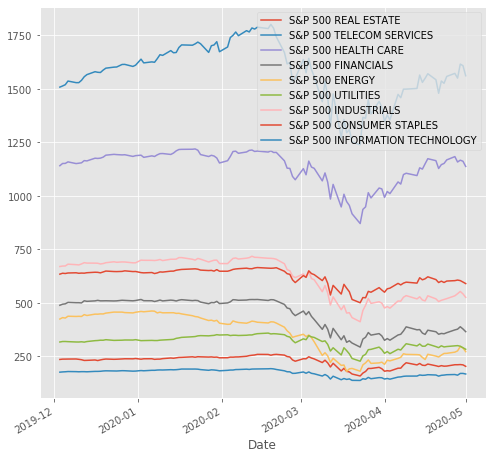

In [41]:
df.plot(x='Date',y=indexList)
plt.show()
#A significant decrease between 2020-03 and 2020-04

In [44]:
PFI = pdr.get_data_yahoo('PFI',start,end)
PFI

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-02,38.419998,38.419998,37.880001,37.880001,37.313862,5200
2019-12-03,37.180000,37.919998,37.180000,37.919998,37.353260,69300
2019-12-04,38.040001,38.169998,38.029999,38.130001,37.560127,11600
2019-12-05,38.150002,38.200001,38.040001,38.189999,37.619225,4300
2019-12-06,38.509998,38.520000,38.480000,38.480000,37.904892,800
...,...,...,...,...,...,...
2020-04-27,31.160000,32.080002,31.160000,32.040001,32.040001,3400
2020-04-28,32.459999,32.459999,31.900000,31.900000,31.900000,2300
2020-04-29,32.419998,32.750000,32.250000,32.560001,32.560001,9800


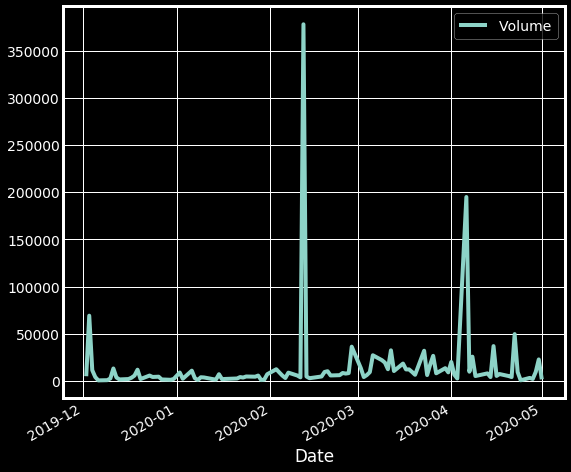

In [48]:
#To see in detail (e.g.PFI)
plt.style.use('dark_background')
PFI.plot(y='Volume')